<a href="https://colab.research.google.com/github/imadmlf/Meta_Heuristique/blob/main/expose_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2A.algo - Réflexions autour du voyage de commerce (TSP)

Le [problème du voyageur de commerce](http://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce) consiste à trouver le plus court chemin passant par toutes les villes. On parle aussi de [circuit hamiltonien](http://en.wikipedia.org/wiki/Hamiltonian_path) qui consiste à trouver le plus court chemin passant par tous les noeuds d'un graphe. Le notebook explore quelques solutions approchées et intuitives.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from itertools import permutations


8


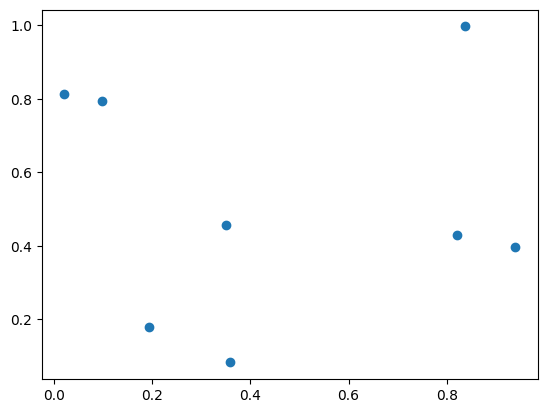

In [63]:
N=8 #nombre de villes
M=10 # dimension de la population
#les coordonnées des villes
x=np.random.uniform(0,1,N)
y=np.random.uniform(0,1,N)
import matplotlib.pyplot as plt
plt.plot(x,y,"o")
print(len(x))

Un parcours aléatoire de tous les noeuds de graphe donnera quelque chose de très éloigné de la solution optimale :

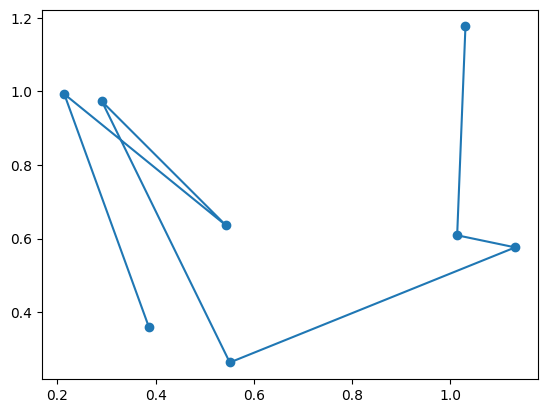

In [64]:
plt.plot(x + [ x[0] ], y + [ y[0] ], "o-")

In [65]:
points = np.array(list(zip(x, y)))
# Calcul de la matrice des distances
dist_matrix = distance_matrix(points, points)

# Initialisation de la longueur minimale
min_length = np.inf
best_path = None

In [66]:
# Recherche de la permutation optimale
for perm in permutations(range(N)):
    length = sum(dist_matrix[perm[i], perm[i+1]] for i in range(N-1))
    length += dist_matrix[perm[-1], perm[0]]  # Ajout de la distance du dernier au premier point

    if length < min_length:
        min_length = length
        best_path = perm

In [67]:
# Affichage du chemin optimal
optimal_path = [points[i] for i in best_path]
print("Chemin optimal:", optimal_path)
print("Longueur minimale:", min_length)

Chemin optimal: [array([0.02092068, 0.81315837]), array([0.35012953, 0.45601207]), array([0.19308281, 0.17990873]), array([0.35805226, 0.08288729]), array([0.82112299, 0.4289087 ]), array([0.93928646, 0.39598598]), array([0.8380057 , 0.99696298]), array([0.09766121, 0.79300232])]
Longueur minimale: 3.1522105695761096


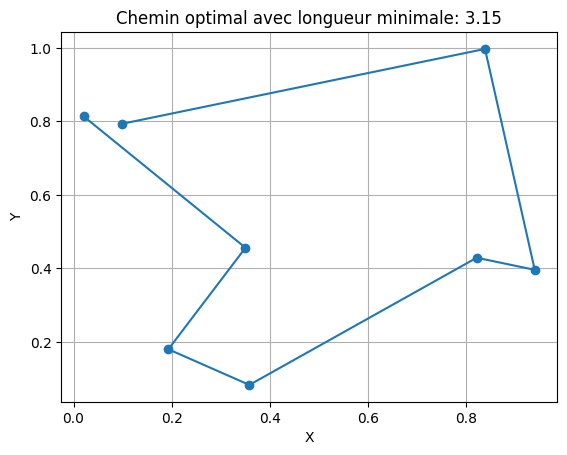

In [68]:
# Traçage du chemin optimal
plt.figure()
plt.plot([point[0] for point in optimal_path], [point[1] for point in optimal_path], marker='o')
#plt.plot([optimal_path[-1][0], optimal_path[0][0]], [optimal_path[-1][1], optimal_path[0][1]], marker='o')  # Lien du dernier au premier point
plt.title("Chemin optimal avec longueur minimale: {:.2f}".format(min_length))
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()